In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data= pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [3]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data)
total_images=len(data)
total_pixels=len(data[0])
print("Rows = ",total_images,"| Columns = ",total_pixels)

Rows =  10000 | Columns =  785


In [5]:
np.random.shuffle(data)
training_data=data[3000:total_images].T
testing_data=data[0:3000].T
X_test=testing_data[1:total_pixels]
Y_train=training_data[0]
X_train=training_data[1:total_pixels]
X_train=X_train/255
print(len(X_train),len(Y_train))
print(X_train)

784 7000
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04705882 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04705882 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [6]:
def weights_and_biases():
    w1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2  


def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A=(np.exp(Z)/sum(np.exp(Z)))
    return A

def forward_propogation(w1,b1,w2,b2,X):
    """"print(len(w1),len(w1[0]),len(X),len(X[0]),len(b1),len(b1[0]))"""
    Z1=w1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=w2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2

    
def one_hot(Y):
    one_hot_y=np.zeros((Y.size,Y.max()+1))
    one_hot_y[np.arange(Y.size),Y]=1
    one_hot_y=one_hot_y.T
    return one_hot_y

def deriv_ReLU(z):
    return z>0

def backward_propogation(z1,a1,z2,a2,w1,w2,x,y):
    m=total_images
    one_hot_y=one_hot(y)
    dz2=a2-one_hot_y
    dw2=1/m*dz2.dot(a1.T)
    db2=1/m*np.sum(dz2)
    dz1=w2.T.dot(dz2)*deriv_ReLU(z1)
    dw1=1/m*dz1.dot(x.T)
    db1=1/m*np.sum(dz1)
    
    return dw1,db1,dw2,db2

def update_weights_and_biases(dw1,db1,dw2,db2,w1,b1,w2,b2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y,iterations,alpha):
    w1,b1,w2,b2=weights_and_biases()
    for i in range(iterations):
        z1,a1,z2,a2=forward_propogation(w1,b1,w2,b2,X)
        dw1,db1,dw2,db2=backward_propogation(z1,a1,z2,a2,w1,w2,X,Y)
        w1,b1,w2,b2=update_weights_and_biases(dw1,db1,dw2,db2,w1,b1,w2,b2,alpha)
        if i % 100==0:
            print("Iteration - ",i)
            print("Accuracy - ",get_accuracy(get_predictions(a2),Y))
    return w1,b1,w2,b2
    

In [8]:
w1,b1,w2,b2=gradient_descent(X_train,Y_train,5000,0.1)

Iteration -  0
[2 2 2 ... 1 2 4] [8 6 6 ... 7 8 7]
Accuracy -  0.11671428571428571
Iteration -  100
[8 4 4 ... 9 8 9] [8 6 6 ... 7 8 7]
Accuracy -  0.6061428571428571
Iteration -  200
[8 6 4 ... 9 8 9] [8 6 6 ... 7 8 7]
Accuracy -  0.6782857142857143
Iteration -  300
[8 0 4 ... 9 8 9] [8 6 6 ... 7 8 7]
Accuracy -  0.7102857142857143
Iteration -  400
[8 0 4 ... 9 8 9] [8 6 6 ... 7 8 7]
Accuracy -  0.7255714285714285
Iteration -  500
[8 0 4 ... 9 8 7] [8 6 6 ... 7 8 7]
Accuracy -  0.7431428571428571
Iteration -  600
[8 0 4 ... 9 8 7] [8 6 6 ... 7 8 7]
Accuracy -  0.7554285714285714
Iteration -  700
[8 0 4 ... 9 8 7] [8 6 6 ... 7 8 7]
Accuracy -  0.7658571428571429
Iteration -  800
[8 0 4 ... 9 8 7] [8 6 6 ... 7 8 7]
Accuracy -  0.7727142857142857
Iteration -  900
[8 0 4 ... 9 8 7] [8 6 6 ... 7 8 7]
Accuracy -  0.7798571428571428
Iteration -  1000
[8 0 4 ... 9 8 7] [8 6 6 ... 7 8 7]
Accuracy -  0.7864285714285715
Iteration -  1100
[8 0 4 ... 9 8 7] [8 6 6 ... 7 8 7]
Accuracy -  0.79157142

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propogation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2,true_res):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    if((int)(prediction[0])==(int)(label) ):
        true_res+=1
    return true_res


In [10]:
true_res=0
for i in range(3000):
    true_res=test_prediction(i, w1, b1, w2, b2,true_res)
    if((i+1)%100==0):
        print("Total tests -",i+1,"\nAccuracy- ",(true_res/(i+1))*100 )

Total tests - 100 
Accuracy-  82.0
Total tests - 200 
Accuracy-  82.0
Total tests - 300 
Accuracy-  82.33333333333334
Total tests - 400 
Accuracy-  82.0
Total tests - 500 
Accuracy-  82.8
Total tests - 600 
Accuracy-  83.0
Total tests - 700 
Accuracy-  83.0
Total tests - 800 
Accuracy-  84.125
Total tests - 900 
Accuracy-  84.44444444444444
Total tests - 1000 
Accuracy-  84.7
Total tests - 1100 
Accuracy-  84.72727272727273
Total tests - 1200 
Accuracy-  84.91666666666666
Total tests - 1300 
Accuracy-  84.92307692307692
Total tests - 1400 
Accuracy-  85.42857142857143
Total tests - 1500 
Accuracy-  85.6
Total tests - 1600 
Accuracy-  85.875
Total tests - 1700 
Accuracy-  85.82352941176471
Total tests - 1800 
Accuracy-  85.88888888888889
Total tests - 1900 
Accuracy-  86.10526315789474
Total tests - 2000 
Accuracy-  86.1
Total tests - 2100 
Accuracy-  86.23809523809524
Total tests - 2200 
Accuracy-  86.27272727272727
Total tests - 2300 
Accuracy-  86.43478260869564
Total tests - 2400 
A

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propogation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2,true_res):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ",prediction[0])
    print("Label: ", label)
    if((int)(prediction[0])==(int)(label) ):
        true_res+=1
    print(true_res,index+1)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    return true_res


Prediction:  8
Label:  8
1 1


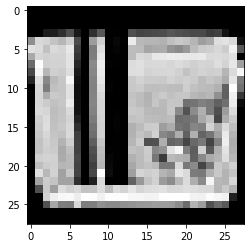

Prediction:  4
Label:  6
1 2


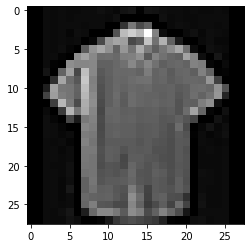

Prediction:  8
Label:  6
1 3


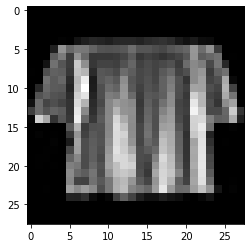

Prediction:  5
Label:  5
2 4


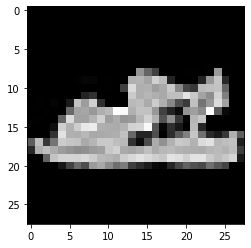

Prediction:  9
Label:  9
3 5


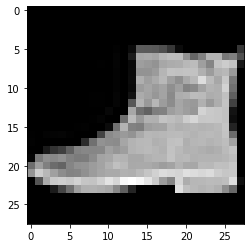

Prediction:  1
Label:  1
4 6


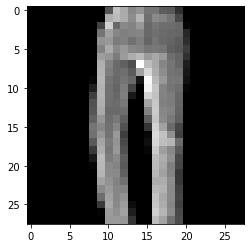

Prediction:  1
Label:  1
5 7


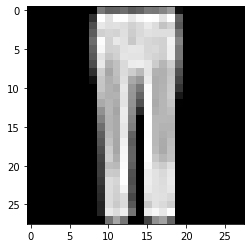

Prediction:  1
Label:  1
6 8


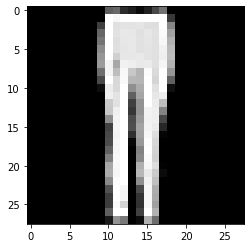

Prediction:  0
Label:  0
7 9


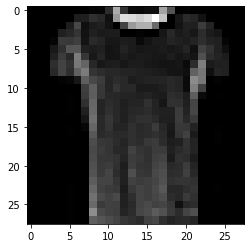

Prediction:  8
Label:  8
8 10


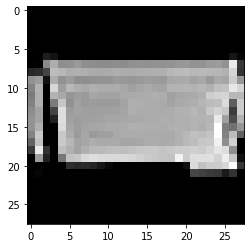

In [12]:
true_res=0
for i in range(10):
    true_res=test_prediction(i, w1, b1, w2, b2,true_res)
    if((i+1)%100==0):
        print("Total tests -",i+1,"\nAccuracy- ",(true_res/(i+1))*100 )
    